Maximise $P(\bm{X}|\log L)$

In [3]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize, least_squares

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import logX_mu, logX_covinv_chol, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs
from aeons.lm_partial import analytic_lm_params
from aeons.bayes import logPr_bayes, logPr_laplace, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()

In [52]:
nk = 500 * np.ones(2)
X_true = generate_Xs(nk)
mean_X = X_mu(nk)
covinv_X = X_Sigmainv(nk)

In [53]:
theta_true = 10
y = simple.func(X_true, 10)

In [49]:
def logPr_X_logL(X, mean, covinv):
    regularization = np.sum(np.log(X))
    gaussian = 1/2 * (X - mean).T @ covinv @ (X - mean)
    return - regularization - gaussian

def logPr_X(X, mean, covinv):
    return -1/2 * (X - mean).T @ covinv @ (X - mean)

0.997979797979798

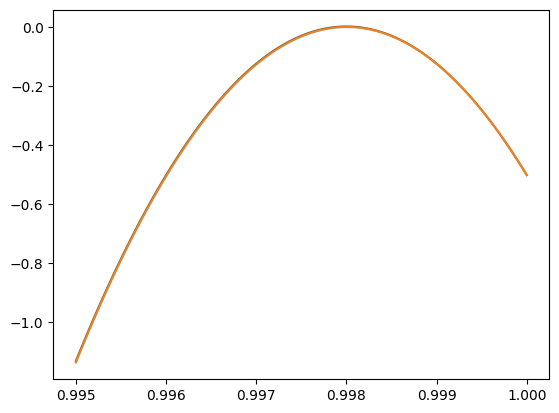

In [51]:
X_poss = np.linspace(0.995, 1, 100)
logprs_X = np.zeros_like(X_poss)
logprs_gauss = np.zeros_like(X_poss)
for i, X in enumerate(X_poss):
    logprs_X[i] = logPr_X_logL(X, mean_X, covinv_X)
    logprs_gauss[i] = logPr_X(X, mean_X, covinv_X)
plt.plot(X_poss, logprs_X)
plt.plot(X_poss, logprs_gauss)
X_poss[np.argmax(logprs_X)]

In [31]:
def minimise_X(mean, covinv):
    def func(X):
        return logPr_X_logL(X, mean, covinv)
    solution = minimize(func, mean, method='Nelder-Mead', bounds=((0,1), (0, 1)))
    return solution

In [32]:
minimise_X(mean_X, covinv_X)

/tmp/ipykernel_55406/1729709116.py:2: RuntimeWarning: divide by zero encountered in log
  regularization = np.sum(np.log(X))


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -251992.38156295256
             x: [ 2.010e-06  1.000e+00]
           nit: 59
          nfev: 99
 final_simplex: (array([[ 2.010e-06,  1.000e+00],
                       [ 1.949e-06,  1.000e+00],
                       [ 1.949e-06,  1.000e+00]]), array([-2.520e+05, -2.520e+05, -2.520e+05]))